# Description
Addressing comment XX on complexity metrics

### Load packages

In [1]:
import networkExpansionPy.lib as ne
import numpy as np
import pandas as pd
import pickle as pickle
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr,pearsonr,mannwhitneyu
from statsmodels.stats.multitest import multipletests
plt.rcParams['font.family'] = 'Arial'
import pingouin as pg


def load_data(network_name):
    with open(ne.asset_path  + "/metabolic_networks/" + network_name,"rb") as filehandler:
        metabolism = pickle.load(filehandler)
    return metabolism

# load the metabolism object from the repo
metabolism = load_data('metabolism.23Aug2022.pkl')
cids = metabolism.coenzymes

In [2]:
import warnings
from scipy.sparse import (spdiags, SparseEfficiencyWarning, csc_matrix,
    csr_matrix, isspmatrix, dok_matrix, lil_matrix, bsr_matrix)
warnings.simplefilter('ignore',SparseEfficiencyWarning)

/Users/joshuagoldford/opt/miniconda3/envs/ne.py3.6/lib/python3.6/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.12, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


### Run network expansion

In [4]:
seed_set = pd.read_csv('../assets/seed_set.csv')['ID'].tolist()

print('There were {N} compounds in this seed set...'.format(N=len(seed_set)))

ne_cpds,ne_rxns = metabolism.expand(seed_set,algorithm='trace')
print('There were {N} compounds produced in this expansion!'.format(N=len(ne_cpds)))

# parse data into dataframes
rn_df = pd.DataFrame(pd.Series(ne_rxns),columns = ['iteration'])
rn_df.reset_index(inplace=True)
rn_df.columns = ['rn','direction','iteration']
rn_df['rn_kegg']= rn_df['rn'].apply(lambda x: x.split('_')[0])

There were 70 compounds in this seed set...
There were 4311 compounds produced in this expansion!


### Plot average molecular complexity vs. expansion iteration

Text(0.1, 0.75, '$r=0.73$ \n$P<10^{-17}$')

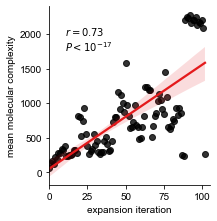

In [16]:
skws={"color": "black"}
cmap = sns.color_palette("Set1")

lkws={'color': cmap[0]}
#complexity = pd.read_csv('../assets/kegg_cpds.iterationComplexity.csv',index_col=0)
complexity_metrics = "../assets/kegg_compound_complexity_metrics.csv"
complexity = pd.read_csv(complexity_metrics,index_col=0).set_index("cid")
feature_type = "bertz"
complexity = complexity[[feature_type]].join(pd.DataFrame(pd.Series(ne_cpds),columns=['iteration']))
sns.lmplot(x='iteration',y=feature_type,data=complexity.groupby('iteration').mean().reset_index(),height=3, aspect=1,line_kws=lkws,scatter_kws=skws)
plt.xlim([0,105])
plt.ylabel('mean molecular complexity')
plt.xlabel('expansion iteration')
c = complexity.groupby('iteration').mean().reset_index()


r,pval = pearsonr(c['iteration'].values,c[feature_type].values)
d = int(np.ceil(np.log10(pval)))
label = '$r={R}$ \n'.format(R=round(r,2)) + '$P<10^{' + str(d) + '}$'
plt.annotate(label, xy=(0.1, 0.75), xycoords='axes fraction')

Text(0.1, 0.75, '$r=0.76$ \n$P<10^{-19}$')

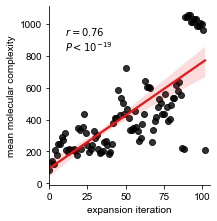

In [17]:
skws={"color": "black"}
cmap = sns.color_palette("Set1")

lkws={'color': cmap[0]}
#complexity = pd.read_csv('../assets/kegg_cpds.iterationComplexity.csv',index_col=0)
complexity_metrics = "../assets/kegg_compound_complexity_metrics.csv"
complexity = pd.read_csv(complexity_metrics,index_col=0).set_index("cid")
feature_type = "mol_weight"
complexity = complexity[[feature_type]].join(pd.DataFrame(pd.Series(ne_cpds),columns=['iteration']))
sns.lmplot(x='iteration',y=feature_type,data=complexity.groupby('iteration').mean().reset_index(),height=3, aspect=1,line_kws=lkws,scatter_kws=skws)
plt.xlim([0,105])
plt.ylabel('mean molecular complexity')
plt.xlabel('expansion iteration')
c = complexity.groupby('iteration').mean().reset_index()


r,pval = pearsonr(c['iteration'].values,c[feature_type].values)
d = int(np.ceil(np.log10(pval)))
label = '$r={R}$ \n'.format(R=round(r,2)) + '$P<10^{' + str(d) + '}$'
plt.annotate(label, xy=(0.1, 0.75), xycoords='axes fraction')

Text(0.1, 0.75, '$r=0.74$ \n$P<10^{-18}$')

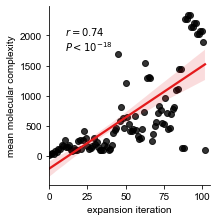

In [20]:
skws={"color": "black"}
cmap = sns.color_palette("Set1")

lkws={'color': cmap[0]}
#complexity = pd.read_csv('../assets/kegg_cpds.iterationComplexity.csv',index_col=0)
complexity_metrics = "../assets/kegg_compound_complexity_metrics.csv"
complexity = pd.read_csv(complexity_metrics,index_col=0).set_index("cid")
feature_type = "weiner"
complexity = complexity[[feature_type]].join(pd.DataFrame(pd.Series(ne_cpds),columns=['iteration']))
sns.lmplot(x='iteration',y=feature_type,data=complexity.groupby('iteration').mean().reset_index(),height=3, aspect=1,line_kws=lkws,scatter_kws=skws)
plt.xlim([0,105])
plt.ylabel('mean molecular complexity')
plt.xlabel('expansion iteration')
c = complexity.groupby('iteration').mean().reset_index()


r,pval = pearsonr(c['iteration'].values,c[feature_type].values)
d = int(np.ceil(np.log10(pval)))
label = '$r={R}$ \n'.format(R=round(r,2)) + '$P<10^{' + str(d) + '}$'
plt.annotate(label, xy=(0.1, 0.75), xycoords='axes fraction')

Text(0.1, 0.75, '$r=-0.69$ \n$P<10^{-15}$')

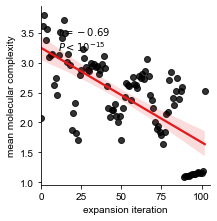

In [21]:
skws={"color": "black"}
cmap = sns.color_palette("Set1")

lkws={'color': cmap[0]}
#complexity = pd.read_csv('../assets/kegg_cpds.iterationComplexity.csv',index_col=0)
complexity_metrics = "../assets/kegg_compound_complexity_metrics.csv"
complexity = pd.read_csv(complexity_metrics,index_col=0).set_index("cid")
feature_type = "balaban"
complexity = complexity[[feature_type]].join(pd.DataFrame(pd.Series(ne_cpds),columns=['iteration']))
sns.lmplot(x='iteration',y=feature_type,data=complexity.groupby('iteration').mean().reset_index(),height=3, aspect=1,line_kws=lkws,scatter_kws=skws)
plt.xlim([0,105])
plt.ylabel('mean molecular complexity')
plt.xlabel('expansion iteration')
c = complexity.groupby('iteration').mean().reset_index()


r,pval = pearsonr(c['iteration'].values,c[feature_type].values)
d = int(np.ceil(np.log10(pval)))
label = '$r={R}$ \n'.format(R=round(r,2)) + '$P<10^{' + str(d) + '}$'
plt.annotate(label, xy=(0.1, 0.75), xycoords='axes fraction')

Text(0.1, 0.75, '$r=0.79$ \n$P<10^{-22}$')

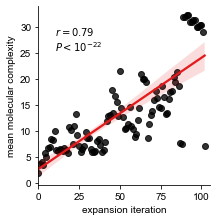

In [22]:
skws={"color": "black"}
cmap = sns.color_palette("Set1")

lkws={'color': cmap[0]}
#complexity = pd.read_csv('../assets/kegg_cpds.iterationComplexity.csv',index_col=0)
complexity_metrics = "../assets/kegg_compound_complexity_metrics.csv"
complexity = pd.read_csv(complexity_metrics,index_col=0).set_index("cid")
feature_type = "randic"
complexity = complexity[[feature_type]].join(pd.DataFrame(pd.Series(ne_cpds),columns=['iteration']))
sns.lmplot(x='iteration',y=feature_type,data=complexity.groupby('iteration').mean().reset_index(),height=3, aspect=1,line_kws=lkws,scatter_kws=skws)
plt.xlim([0,105])
plt.ylabel('mean molecular complexity')
plt.xlabel('expansion iteration')
c = complexity.groupby('iteration').mean().reset_index()


r,pval = pearsonr(c['iteration'].values,c[feature_type].values)
d = int(np.ceil(np.log10(pval)))
label = '$r={R}$ \n'.format(R=round(r,2)) + '$P<10^{' + str(d) + '}$'
plt.annotate(label, xy=(0.1, 0.75), xycoords='axes fraction')